## Lead Scoring Case Study

### Problem Statement

Build  a model where you need to assign lead scores to all the leads who are visited page. The leads having higher lead score have higher conversion chance and leads having lower lead score have lower convesion chance. The model accuracy should be greater than 80%, so that 80% leads have higher conversion rate.

### Goals of the case study

1) Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2)There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.



#### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.api import GLM
from statsmodels.api import add_constant
from statsmodels.api import families
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
pd.set_option("display.max_column", 500)

#### Import the Dataset

In [2]:
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_score = lead_df.copy()
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Sanity Check

In [4]:
round(lead_score.isnull().sum()/len(lead_score)*100,2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

In [5]:
lead_score = lead_score.replace('Select', np.NaN)

In [6]:
round(lead_score.isnull().sum()/len(lead_score)*100,2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

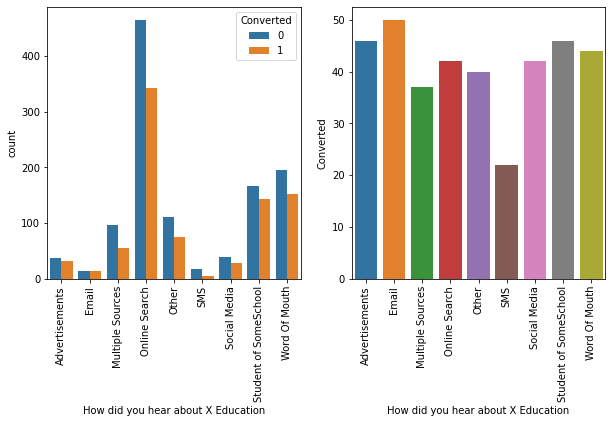

In [7]:
order = sorted(lead_score['How did you hear about X Education'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'How did you hear about X Education',hue = 'Converted',data = lead_score,order = order)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x= 'How did you hear about X Education',y='Converted',data = round(100*lead_score.groupby('How did you hear about X Education')['Converted'].mean()).reset_index())
plt.xticks(rotation = 90)
plt.show()

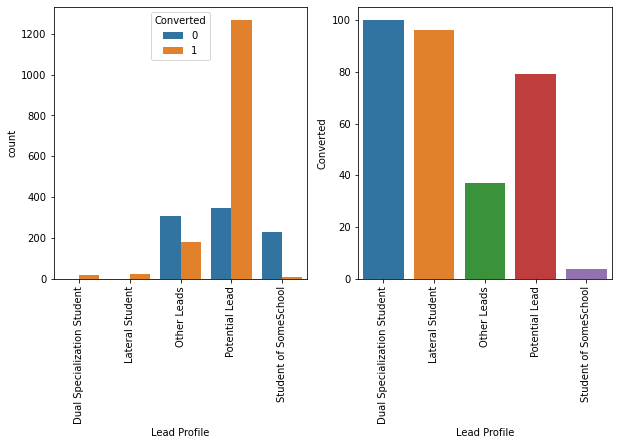

In [8]:
order = sorted(lead_score['Lead Profile'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Lead Profile',hue = 'Converted',data = lead_score,order = order)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x= 'Lead Profile',y='Converted',data = round(100*lead_score.groupby('Lead Profile')['Converted'].mean()).reset_index())
plt.xticks(rotation = 90)
plt.show()

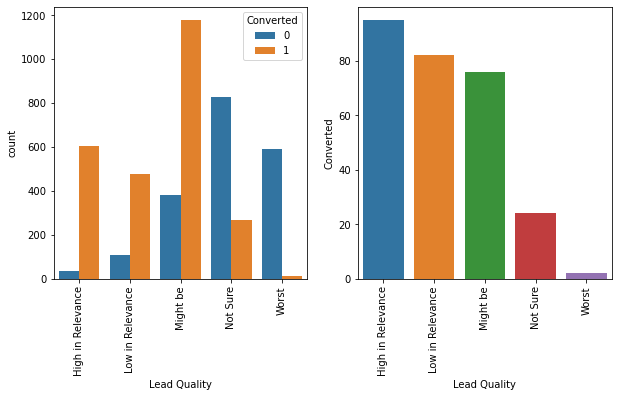

In [9]:
order = sorted(lead_score['Lead Quality'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Lead Quality',hue = 'Converted',data = lead_score,order = order)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x= 'Lead Quality',y='Converted',data = round(100*lead_score.groupby('Lead Quality')['Converted'].mean()).reset_index())
plt.xticks(rotation = 90)
plt.show()

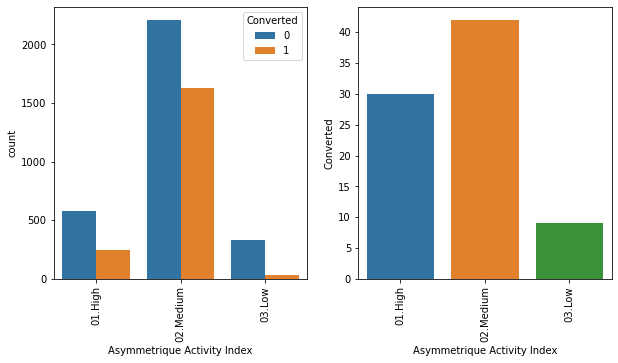

In [10]:
order = sorted(lead_score['Asymmetrique Activity Index'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Asymmetrique Activity Index',hue = 'Converted',data = lead_score,order = order)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x= 'Asymmetrique Activity Index',y='Converted',data = round(100*lead_score.groupby('Asymmetrique Activity Index')['Converted'].mean()).reset_index())
plt.xticks(rotation = 90)
plt.show()

#### Handling Missing Values

In [11]:
lead_score.drop(["How did you hear about X Education", 
                 "Lead Profile", "Lead Quality", "Asymmetrique Profile Score", 
                 "Asymmetrique Activity Score", "Asymmetrique Profile Index", "Asymmetrique Activity Index"], axis = 1, inplace = True)
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [12]:
round(lead_score.isnull().sum()/len(lead_score)*100,2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search    

### EDA 

#### Data Processing

In [13]:
cols = ['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 
        'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 
        'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 
        'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
        'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 
        'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 
        'A free copy of Mastering The Interview', 'Last Notable Activity']
for i in cols:
    print(i)
    print("\n", lead_score[i].value_counts(), ":\n")
    print("\n")

Lead Number

 608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64 :



Lead Origin

 Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 :



Lead Source

 Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
youtubechannel          1
WeLearn                 1
blog                    1
Pay per Click Ads       1
testone                 1
NC_EDM                  1
welearnblog_Home        1
Name: Lead Source, dtype: int64 


 Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Approached upfront                 1
Form Submitted on Website          1
Email Received                     1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64 :





In [14]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


#### Drop Unnecessary Columns According To Distribution Of Values of Each Columns

In [15]:
drop_cols = ['Do Not Call','Search','Newspaper Article',
       'X Education Forums', 'Digital Advertisement','Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content',
       'Get updates on DM Content','I agree to pay the amount through cheque','What matters most to you in choosing a course']
lead_score.drop(drop_cols, axis = 1,inplace = True)
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Country                                 6779 non-null   obje

In [16]:
round(lead_score.isnull().sum()/len(lead_score)*100,2).sort_values(ascending = False)

City                                      39.71
Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
Country                                   26.63
Page Views Per Visit                       1.48
TotalVisits                                1.48
Last Activity                              1.11
Lead Source                                0.39
Converted                                  0.00
Lead Number                                0.00
Lead Origin                                0.00
Do Not Email                               0.00
Last Notable Activity                      0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Magazine                                   0.00
Newspaper                                  0.00
Prospect ID                                0.00
dtype: float64

#### FIll missing categorical values with random choice form that column

In [17]:
cols1 = ["City", "Specialization", "Tags", "What is your current occupation", "Country"]
for i in cols1:
  np.random.seed(10)
  s  = lead_score[i].value_counts(normalize=True)
  null  = lead_score[i].isnull()
  lead_score.loc[null,i] = np.random.choice(s.index, size=len(lead_score[null]), p=s.values)    

In [18]:
round(lead_score.isnull().sum()/len(lead_score)*100,2).sort_values(ascending = False)

Page Views Per Visit                      1.48
TotalVisits                               1.48
Last Activity                             1.11
Lead Source                               0.39
Lead Number                               0.00
Lead Origin                               0.00
Do Not Email                              0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Last Notable Activity                     0.00
A free copy of Mastering The Interview    0.00
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Magazine                                  0.00
Newspaper                                 0.00
Tags                                      0.00
City                                      0.00
Prospect ID                               0.00
dtype: float64

In [19]:
for i in cols1:
    print(i)
    print("\n", lead_score[i].value_counts(), ":\n")
    print("\n")

City

 Mumbai                         5354
Thane & Outskirts              1250
Other Cities                   1116
Other Cities of Maharashtra     760
Other Metro Cities              640
Tier II Cities                  120
Name: City, dtype: int64 :



Specialization

 Finance Management                   1579
Human Resource Management            1376
Marketing Management                 1275
Operations Management                 779
Business Administration               628
IT Projects Management                584
Supply Chain Management               542
Banking, Investment And Insurance     532
Media and Advertising                 328
Travel and Tourism                    316
International Business                271
Healthcare Management                 243
Hospitality Management                192
E-COMMERCE                            172
Retail Management                     160
Rural and Agribusiness                115
E-Business                             89
Services Excelle

#### Drop rows having missing values

In [20]:
lead_score = lead_score.dropna(how = "any", axis = 0)

In [21]:
round(lead_score.isnull().sum()/len(lead_score)*100, 2).sort_values(ascending = False)

Last Notable Activity                     0.0
Page Views Per Visit                      0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Last Activity                             0.0
A free copy of Mastering The Interview    0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Magazine                                  0.0
Newspaper                                 0.0
Tags                                      0.0
City                                      0.0
Prospect ID                               0.0
dtype: float64

In [22]:
lead_score.describe(percentiles = (0.10, .25, .50, .75, .90, .95, .99))

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
10%,586310.100000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000


#### Outlier Treatment

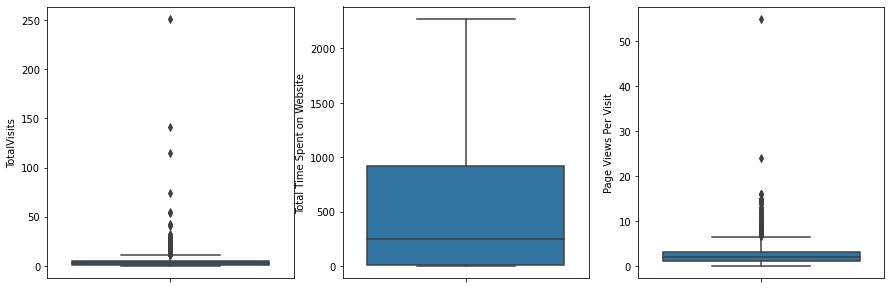

In [23]:
dec = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
plt.figure(figsize = (15, 5))
for i in dec:
    plt.subplot(1,3, dec.index(i)+1)
    sns.boxplot(y = lead_score[i])
plt.show()

In [24]:
Q3 = lead_score.TotalVisits.quantile(0.99)
lead_score = lead_score[(lead_score.TotalVisits <= Q3)]

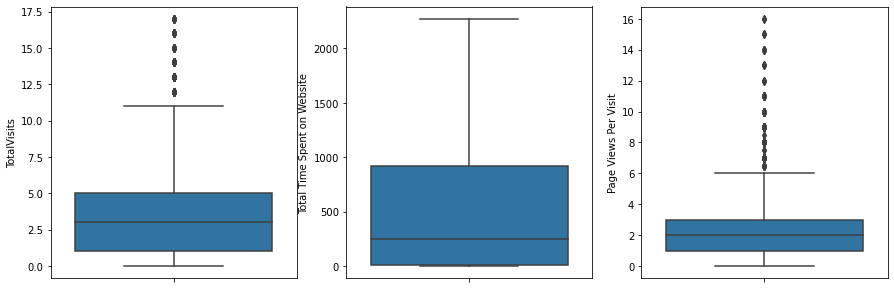

In [25]:
dec = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
plt.figure(figsize = (15, 5))
for i in dec:
    plt.subplot(1,3, dec.index(i)+1)
    sns.boxplot(y = lead_score[i])
plt.show()

In [26]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Magazine,Newspaper,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,"Banking, Investment And Insurance",Unemployed,No,No,Interested in other courses,Other Cities,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,No,No,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,IT Projects Management,Unemployed,No,No,Will revert after reading the email,Mumbai,No,Modified


#### Drop Prospect ID because it have unique values so we can't do analysis on it
#### Drop Last Notable Activity because this column is very similar to Last Activity

In [27]:
lead_score.drop(["Prospect ID", "Last Notable Activity"], axis =1, inplace = True)

In [28]:
lead_score.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Magazine', 'Newspaper', 'Tags',
       'City', 'A free copy of Mastering The Interview'],
      dtype='object')

#### Univariate Analysis of Data By Visualization

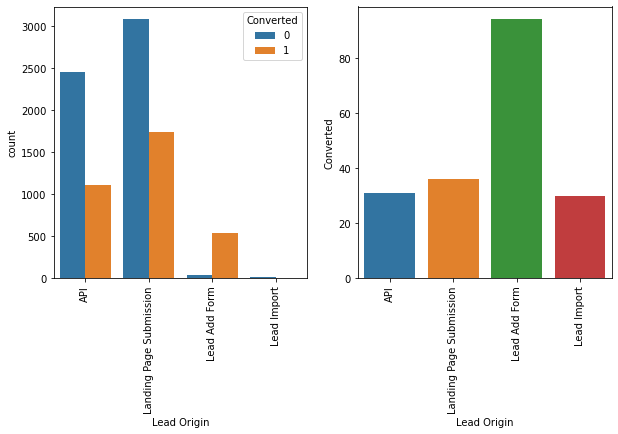

In [29]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_score)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x= 'Lead Origin',y='Converted',data = round(100*lead_score.groupby('Lead Origin')['Converted'].mean()).reset_index())
plt.xticks(rotation = 90)
plt.show()

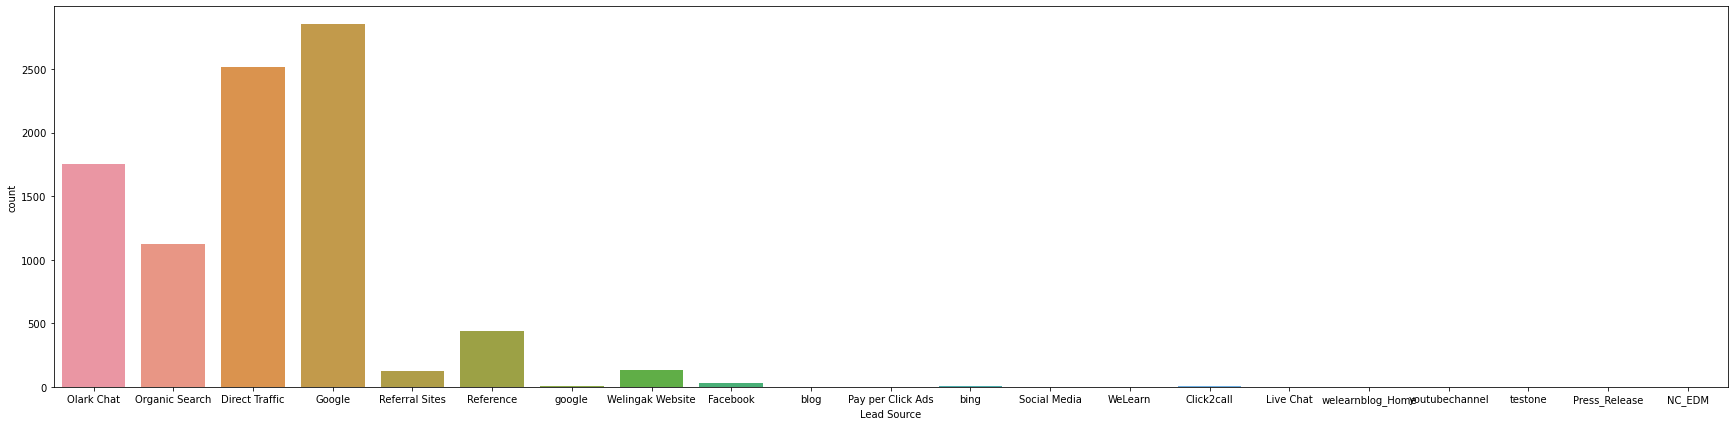

In [30]:
plt.figure(figsize = (30,7))
sns.countplot(lead_score["Lead Source"])
plt.show()

#### Check Spelling Mistake and merging values of columns according to their number of occurance for easy analysis

In [31]:
lead_score['Lead Source'] = lead_score['Lead Source'].replace(['google'], 'Google')
lead_score['Lead Source'] = lead_score['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

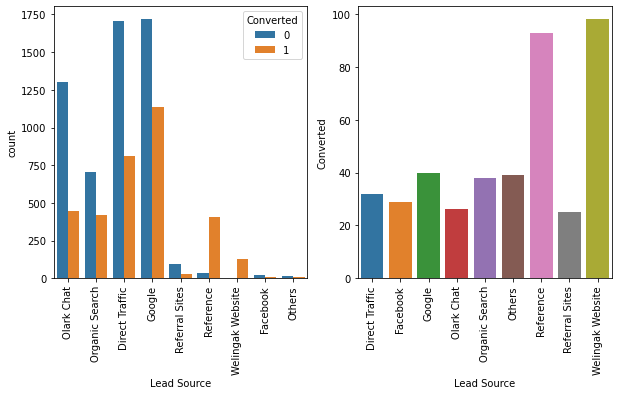

In [32]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_score)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x= 'Lead Source',y='Converted',data = round(100*lead_score.groupby('Lead Source')['Converted'].mean()).reset_index())
plt.xticks(rotation = 90)
plt.show()

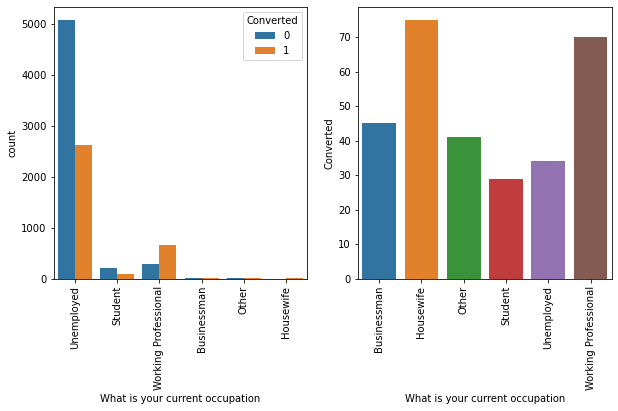

In [33]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_score)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x= 'What is your current occupation',y='Converted',data = round(100*lead_score.groupby('What is your current occupation')['Converted'].mean()).reset_index())
plt.xticks(rotation = 90)
plt.show()

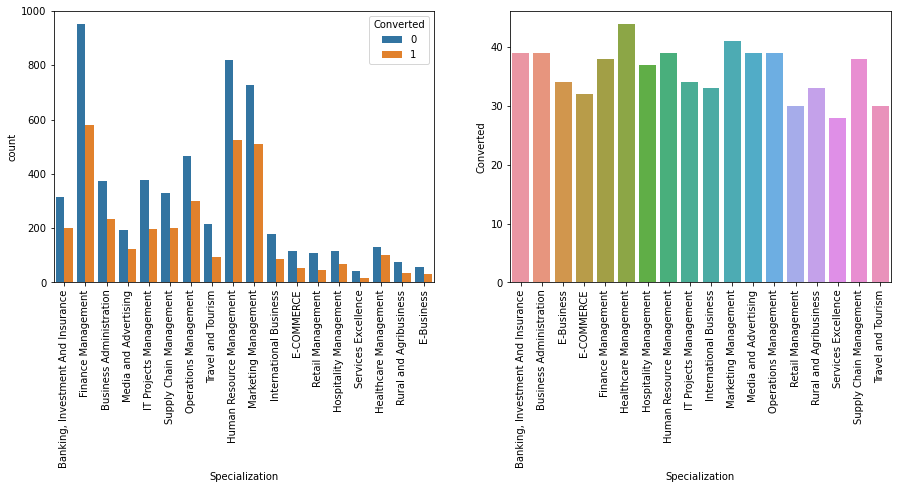

In [34]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(x = "Specialization", hue = "Converted", data = lead_score)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x= 'Specialization',y='Converted',data = round(100*lead_score.groupby('Specialization')['Converted'].mean()).reset_index())
plt.xticks(rotation = 90)
plt.show()

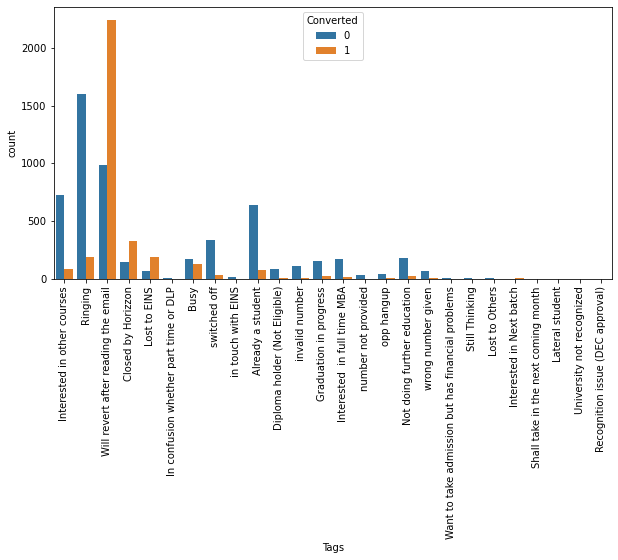

In [35]:
plt.figure(figsize = (10, 5))
sns.countplot(x = "Tags", hue = "Converted", data = lead_score)
plt.xticks(rotation = 90)
plt.show()

In [36]:
lead_score['Tags'] = lead_score['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

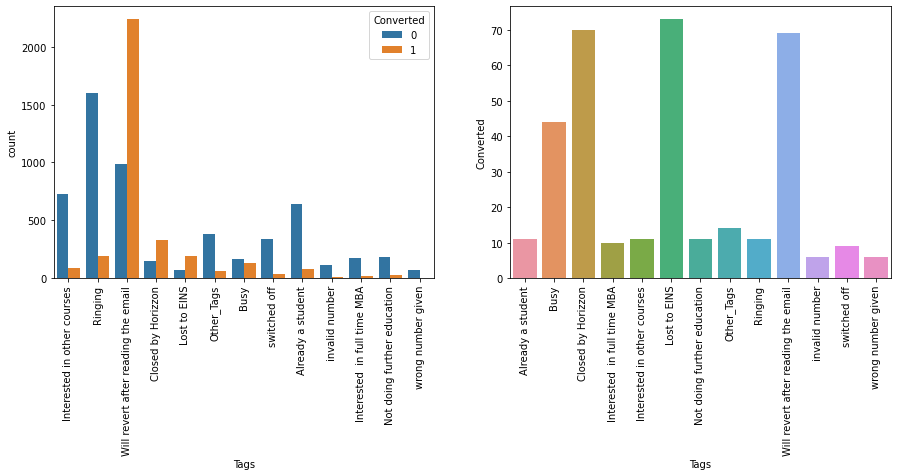

In [37]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(x = "Tags", hue = "Converted", data = lead_score)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x= 'Tags',y='Converted',data = round(100*lead_score.groupby('Tags')['Converted'].mean()).reset_index())
plt.xticks(rotation = 90)
plt.show()

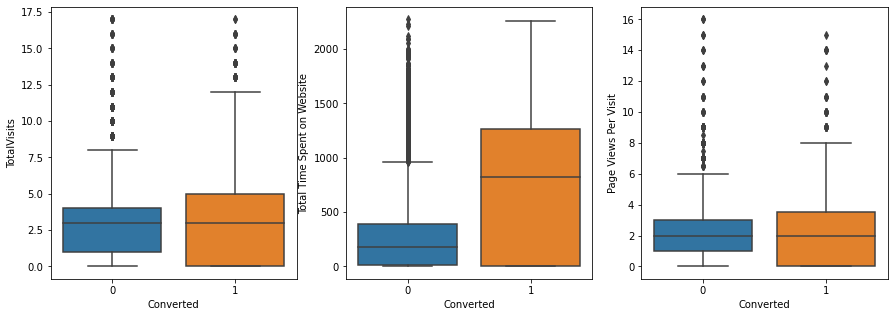

In [38]:
dec = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
plt.figure(figsize = (15, 5))
for i in dec:
    plt.subplot(1,3, dec.index(i)+1)
    sns.boxplot(y = lead_score[i], x = lead_score["Converted"])
plt.show()

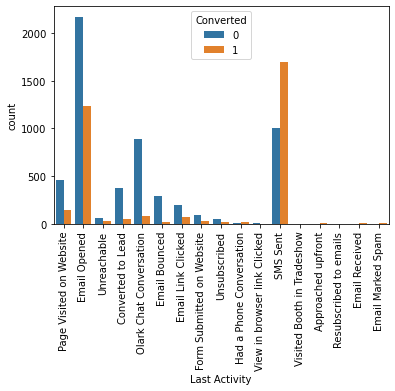

In [39]:
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_score)
plt.xticks(rotation = 90)
plt.show()

In [40]:
lead_score['Last Activity'] = lead_score['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

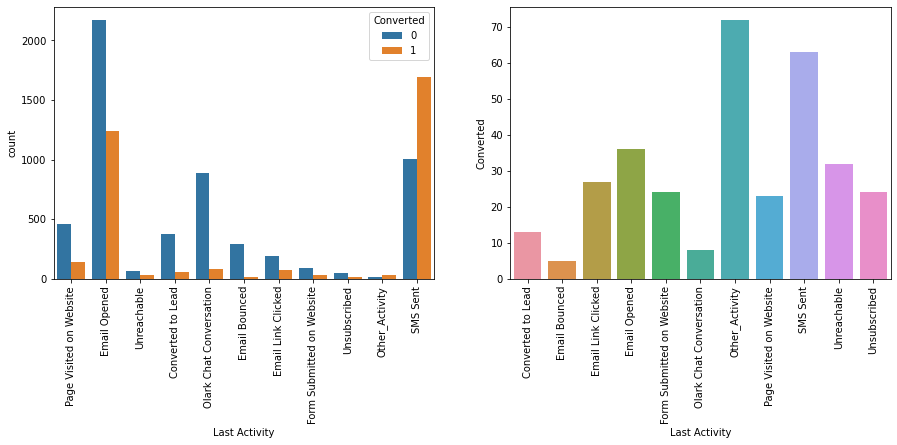

In [41]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_score)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x= 'Last Activity',y='Converted',data = round(100*lead_score.groupby('Last Activity')['Converted'].mean()).reset_index())
plt.xticks(rotation = 90)
plt.show()

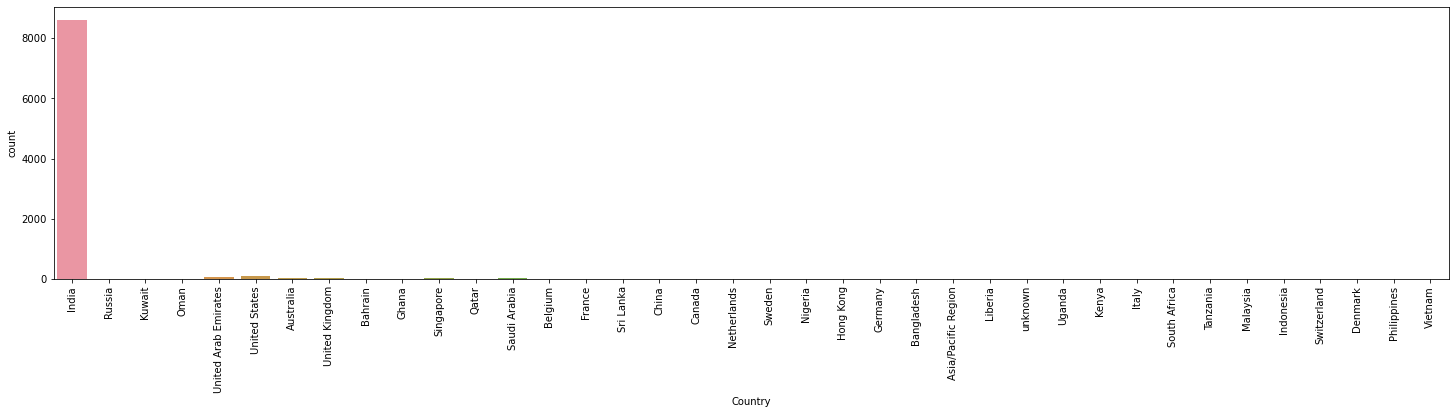

In [42]:
plt.figure(figsize = (25,5))
sns.countplot(lead_score["Country"])
plt.xticks(rotation = 90)
plt.show()

In [43]:
lead_score['Country'] = lead_score['Country'].replace(["unknown", "Hong Kong", "Nigeria", "South Africa", "Kuwait", "China", "Italy", "Germany", "Netherlands",
      "Ghana", "Canada", "Sweden", "Uganda", "Indonesia", "Switzerland", "Philippines", "Asia/Pacific Region", "Russia", 
      "Belgium", "Denmark", "Bangladesh", "Kenya", "Tanzania", "Liberia", "Vietnam", "Malaysia", "Sri Lanka"], 'Other_Country')

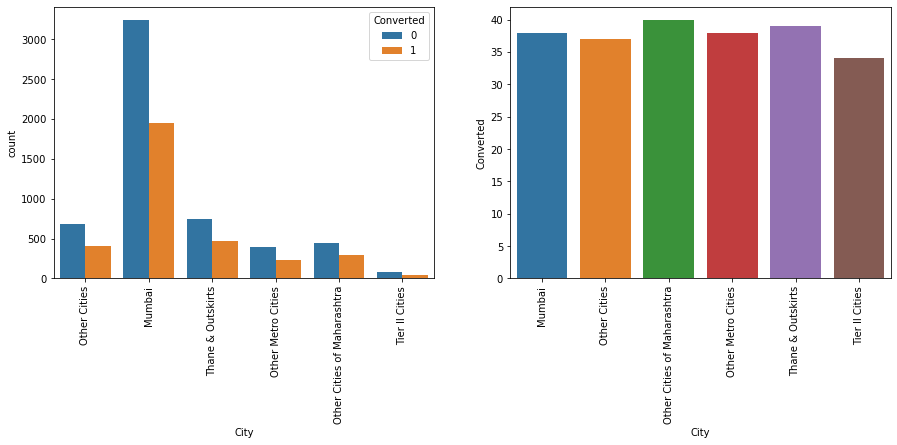

In [44]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(x = "City", hue = "Converted", data = lead_score)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x= 'City',y='Converted',data = round(100*lead_score.groupby('City')['Converted'].mean()).reset_index())
plt.xticks(rotation = 90)
plt.show()

#### Creating Dummy Variables 

In [45]:
cat_vars = ['Do Not Email', 'Magazine', 'Newspaper', 'A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
lead_score[cat_vars] = lead_score[cat_vars].apply(binary_map)

In [46]:
lead_score.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Magazine,Newspaper,Tags,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,"Banking, Investment And Insurance",Unemployed,0,0,Interested in other courses,Other Cities,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,0,0,Ringing,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,0,0,Will revert after reading the email,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,0,0,Ringing,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,IT Projects Management,Unemployed,0,0,Will revert after reading the email,Mumbai,0


In [47]:
dummy_cols = ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview','Country','Specialization','Tags','City', "Magazine", "Newspaper"]
for i in dummy_cols:
    ts = pd.get_dummies(lead_score[i], prefix = i, drop_first = True)
    lead_score = pd.concat([lead_score, ts], axis =1)
    lead_score.drop(i, axis =1, inplace = True)
lead_score.head()    

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_1,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_1,Country_Bahrain,Country_France,Country_India,Country_Oman,Country_Other_Country,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Newspaper_1
0,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


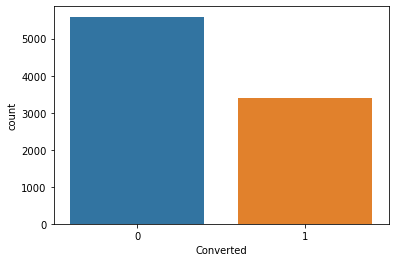

In [48]:
sns.countplot(lead_score["Converted"])
plt.show()

In [49]:
print("convertion rate is: ", round(lead_score["Converted"].sum()/len(lead_score)*100,2))

convertion rate is:  37.8


In [50]:
# sns.heatmap(lead_score.corr(), annot = True)
# plt.show()

#### The matrix is symmetric so we have to extract the upper triangle matrix without diagonal (k = 1)


In [51]:
corr_mat = lead_score.corr().abs()
upper = (corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

In [52]:
upper.head(15)

Lead Origin_Lead Import                     Lead Source_Facebook                                    0.983684
Lead Origin_Lead Add Form                   Lead Source_Reference                                   0.865891
What is your current occupation_Unemployed  What is your current occupation_Working Professional    0.841653
TotalVisits                                 Page Views Per Visit                                    0.739454
Do Not Email_1                              Last Activity_Email Bounced                             0.626943
Lead Origin_Landing Page Submission         A free copy of Mastering The Interview_1                0.564083
                                            Lead Source_Olark Chat                                  0.528543
Page Views Per Visit                        Lead Source_Olark Chat                                  0.524985
Last Activity_Email Opened                  Last Activity_SMS Sent                                  0.512086
Page Views Per Visi

In [53]:
upper.tail(15)

TotalVisits                                 Tags_Will revert after reading the email    0.000074
Specialization_Business Administration      Tags_Not doing further education            0.000070
What is your current occupation_Student     City_Other Cities                           0.000070
What is your current occupation_Unemployed  Country_United Kingdom                      0.000068
Country_Qatar                               City_Other Cities of Maharashtra            0.000063
Specialization_Supply Chain Management      City_Tier II Cities                         0.000061
TotalVisits                                 Country_Bahrain                             0.000054
Specialization_E-Business                   Tags_Not doing further education            0.000051
Lead Source_Facebook                        What is your current occupation_Student     0.000038
Lead Source_Welingak Website                City_Other Metro Cities                     0.000038
                              

In [54]:
# plt.plot(upper)
# plt.show()

#### Setting Target Variables

In [55]:
y=lead_score.pop('Converted')
X=lead_score

#### Splitting Dataset Into Train and Test Dataset

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [57]:
X_train.shape, X_test.shape

((6293, 78), (2698, 78))

#### Scaleing Train DataSet

In [58]:
# setting scale object
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [59]:
corr_mat_train = X_train.corr().abs()
upper_corr = (corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

In [60]:
upper_corr.head(15)

Lead Origin_Lead Import                     Lead Source_Facebook                                    0.983684
Lead Origin_Lead Add Form                   Lead Source_Reference                                   0.865891
What is your current occupation_Unemployed  What is your current occupation_Working Professional    0.841653
TotalVisits                                 Page Views Per Visit                                    0.739454
Do Not Email_1                              Last Activity_Email Bounced                             0.626943
Lead Origin_Landing Page Submission         A free copy of Mastering The Interview_1                0.564083
                                            Lead Source_Olark Chat                                  0.528543
Page Views Per Visit                        Lead Source_Olark Chat                                  0.524985
Last Activity_Email Opened                  Last Activity_SMS Sent                                  0.512086
Page Views Per Visi

In [61]:
upper_corr.tail(15)

TotalVisits                                 Tags_Will revert after reading the email    0.000074
Specialization_Business Administration      Tags_Not doing further education            0.000070
What is your current occupation_Student     City_Other Cities                           0.000070
What is your current occupation_Unemployed  Country_United Kingdom                      0.000068
Country_Qatar                               City_Other Cities of Maharashtra            0.000063
Specialization_Supply Chain Management      City_Tier II Cities                         0.000061
TotalVisits                                 Country_Bahrain                             0.000054
Specialization_E-Business                   Tags_Not doing further education            0.000051
Lead Source_Facebook                        What is your current occupation_Student     0.000038
Lead Source_Welingak Website                City_Other Metro Cities                     0.000038
                              

In [62]:
# Storing Lead Number as key for further use

X_train_key=X_train.pop("Lead Number")
X_test_key=X_test.pop("Lead Number")

### Model Building

In [63]:
# Logistic regression model
lg_model = sm.GLM(y_train,(sm.add_constant(X_train).astype(float)), family = sm.families.Binomial())
print(lg_model.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6216
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Apr 2020   Deviance:                          nan
Time:                        06:45:18   Pearson chi2:                 6.88e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Remove the Lead Number Column For Feuture Reference (For Merging Predicted Model With Original Dataset)

In [64]:
X_key=X.pop('Lead Number')

#### Feature Elimation By Using Recursive Feature Elimination (RFE) Method

In [65]:
# Selecting features using RFE 
log_model = LogisticRegression()

rfe = RFE(log_model, 15)             
rfe = rfe.fit(X_train, y_train)

In [66]:
# listing the columns 
sorted(list(zip(rfe.ranking_,X_train.columns, rfe.support_)))

[(1, 'Country_Qatar', True),
 (1, 'Do Not Email_1', True),
 (1, 'Last Activity_Olark Chat Conversation', True),
 (1, 'Last Activity_Other_Activity', True),
 (1, 'Last Activity_SMS Sent', True),
 (1, 'Lead Origin_Lead Add Form', True),
 (1, 'Lead Source_Olark Chat', True),
 (1, 'Lead Source_Welingak Website', True),
 (1, 'Tags_Busy', True),
 (1, 'Tags_Closed by Horizzon', True),
 (1, 'Tags_Lost to EINS', True),
 (1, 'Tags_Will revert after reading the email', True),
 (1, 'Tags_switched off', True),
 (1, 'Total Time Spent on Website', True),
 (1, 'What is your current occupation_Working Professional', True),
 (2, 'Country_Other_Country', False),
 (3, 'Lead Source_Facebook', False),
 (4, 'Lead Source_Reference', False),
 (5, 'Last Activity_Unsubscribed', False),
 (6, 'Tags_wrong number given', False),
 (7, 'Tags_Ringing', False),
 (8, 'Tags_invalid number', False),
 (9, 'Country_Singapore', False),
 (10, 'Specialization_Services Excellence', False),
 (11, 'What is your current occupation_

In [67]:
cols = X_train.columns[rfe.support_]
temp= X_train.columns[~rfe.support_]

In [68]:
X_train_sm = sm.add_constant(X_train[cols])
lg_model1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res1 = lg_model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2045.3
Date:                Mon, 20 Apr 2020   Deviance:                       4090.7
Time:                        06:45:31   Pearson chi2:                 6.47e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9682      0.090    -33.156      0.000      -3.144      -2.793
Total Time Spent on Website                              1.0689      0.046     23.289      0.000       0.979       1.159
Lead Origin_Lead Add Form                                3.4339      0.275     12.495      0.000       2.895       3.973
Lead Source_Olark Chat                                   1.0310      0.118      8.724      0.000       0.799       1.263
Lead Source_Welingak Website                             3.4100      1.059      3.219      0.001       1.334       5.486
Do Not Email_1                                          -1.6270      0.186     -8.754      0.000      -1.991      -1.263
Last Activity_Olark Chat Conversation                   -1.5058      0.174     -8.661      0.000      -1.847      -1.165
Last Activity_Other_Activity                             1.1949      0.505      2.368      0.018       0.206       2.184
Last Activity_SMS Sent                                   1.6515      0.091     18.151      0.000       1.473       1.830
What is your current occupation_Working Professional     0.9193      0.137      6.707      0.000       0.651       1.188
Country_Qatar                                          -22.1357   1.27e+04     -0.002      0.999   -2.49e+04    2.49e+04
Tags_Busy                                                1.7875      0.186      9.632      0.000       1.424       2.151
Tags_Closed by Horizzon                                  2.8630      0.175     16.353      0.000       2.520       3.206
Tags_Lost to EINS                                        3.5391      0.219     16.183      0.000       3.110       3.968
Tags_Will revert after reading the email                 2.8170      0.094     30.056      0.000       2.633       3.001
Tags_switched off                                       -0.9227      0.283     -3.261      0.001      -1.477      -0.368
========================================================================================================================
"""

#### Dropping column with High P-Value 

In [69]:
X_train_sm.drop('Country_Qatar', axis = 1, inplace  = True)
# building another model after dropping variable

lg_ml2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res2 = lg_ml2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2049.0
Date:                Mon, 20 Apr 2020   Deviance:                       4098.0
Time:                        06:45:31   Pearson chi2:                 6.47e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9702      0.089    -33.199      0.000      -3.146      -2.795
Total Time Spent on Website                              1.0672      0.046     23.304      0.000       0.977       1.157
Lead Origin_Lead Add Form                                3.4356      0.275     12.504      0.000       2.897       3.974
Lead Source_Olark Chat                                   1.0326      0.118      8.741      0.000       0.801       1.264
Lead Source_Welingak Website                             3.4089      1.059      3.218      0.001       1.333       5.485
Do Not Email_1                                          -1.6234      0.186     -8.740      0.000      -1.987      -1.259
Last Activity_Olark Chat Conversation                   -1.5086      0.174     -8.680      0.000      -1.849      -1.168
Last Activity_Other_Activity                             1.1972      0.505      2.373      0.018       0.208       2.186
Last Activity_SMS Sent                                   1.6486      0.091     18.143      0.000       1.471       1.827
What is your current occupation_Working Professional     0.9231      0.137      6.738      0.000       0.655       1.192
Tags_Busy                                                1.7907      0.185      9.654      0.000       1.427       2.154
Tags_Closed by Horizzon                                  2.8642      0.175     16.365      0.000       2.521       3.207
Tags_Lost to EINS                                        3.5406      0.219     16.195      0.000       3.112       3.969
Tags_Will revert after reading the email                 2.8140      0.094     30.060      0.000       2.631       2.998
Tags_switched off                                       -0.9196      0.283     -3.252      0.001      -1.474      -0.365
========================================================================================================================
"""

### Predict The Model

In [70]:
y_train_pred = res2.predict(X_train_sm)

In [71]:
y_train_pred = y_train_pred.values.reshape(-1)

In [72]:
# Makeing a dataframe contains y_train, and prediction
y_train_pred_final = pd.DataFrame({"converted": y_train.values, "pred_prob": y_train_pred})
y_train_pred_final.head()

,converted,pred_prob
0,1,0.962016
1,0,0.009591
2,1,0.689834
3,1,0.829806
4,0,0.483910


In [73]:
y_train_pred_final['predicted'] = y_train_pred_final.pred_prob.map(lambda x: 1 if x >0.5 else 0)

In [74]:
y_train_pred_final

,converted,pred_prob,predicted
0,1,0.962016,1
1,0,0.009591,0
2,1,0.689834,1
3,1,0.829806,1
4,0,0.483910,0
...,...,...,...
6288,0,0.012285,0
6289,1,0.702390,1
6290,1,0.835149,1
6291,0,0.053231,0


### Creating Confusion Matrix

In [75]:
CM1  = confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted)
print(CM1)

[[3593  333]
 [ 522 1845]]


In [76]:
accu_score = accuracy_score(y_train_pred_final.predicted, y_train_pred_final.converted)

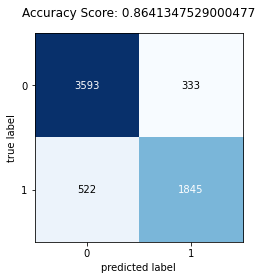

In [77]:
fig, ax = plot_confusion_matrix(conf_mat=CM1)
all_sample_title = 'Accuracy Score: {0}'.format(accu_score)
plt.title(all_sample_title, size = 12);
plt.tight_layout()
plt.show()

### Checking VIF

The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif["vif_values"] =[variance_inflation_factor(X_train_sm.values,i)for i in range(X_train_sm.shape[1])]
vif["vif_values"] = round(vif["vif_values"],2)
vif = vif.sort_values(by = "vif_values", ascending = False)
vif

,Features,vif_values
0,const,3.01
2,Lead Origin_Lead Add Form,1.54
3,Lead Source_Olark Chat,1.44
1,Total Time Spent on Website,1.37
13,Tags_Will revert after reading the email,1.31
4,Lead Source_Welingak Website,1.28
6,Last Activity_Olark Chat Conversation,1.26
11,Tags_Closed by Horizzon,1.16
8,Last Activity_SMS Sent,1.13
9,What is your current occupation_Working Profes...,1.08


##### tp = True Positive
##### tn = True Negative
##### fp = False Positive
##### fn = False Neagatve

In [79]:
tp = CM1[1,1] 
tn = CM1[0,0] 
fp = CM1[0,1] 
fn = CM1[1,0] 
print("True Positive is", tp,', True Negative is', tn)
print("False Positive is", fp, ", False Negative is", fn)

True Positive is 1845 , True Negative is 3593
False Positive is 333 , False Negative is 522


#### Calculating  Accuracy, Sensitivity and Specificity

In [80]:
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
Accuracy = (tn+tp)/(tn+tp+fp+fn)
print("sensitivity is ", sensitivity, ", specificity is", specificity)
print("\n")
print("Accuracy  is", Accuracy)

sensitivity is  0.779467680608365 , specificity is 0.9151808456444218


Accuracy  is 0.8641347529000477


### Plotting the ROC curve

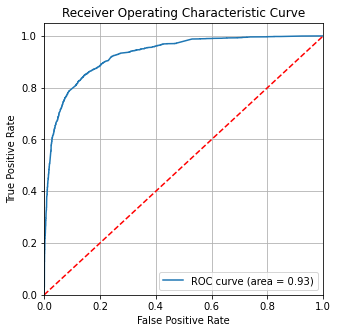

In [81]:
# Function For Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    return None

fpr, tpr, thresholds = roc_curve( y_train_pred_final.converted, y_train_pred_final.pred_prob, drop_intermediate = False )

draw_roc( y_train_pred_final.converted, y_train_pred_final.pred_prob)

### Calculating the Area Under the Curve(GINI Model)

In [82]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

auc = auc_val(fpr,tpr)
auc

0.929345134674628

***As per thumb rule, an AUC can be classed as follows,***

 - 0.90 - 1.00 = excellent
 - 0.80 - 0.90 = good
 - 0.70 - 0.80 = fair
 - 0.60 - 0.70 = poor
 - 0.50 - 0.60 = fail
 
***Since we got a value of 0.9293, our model seems to be doing well on the test dataset.***

##### Finding optimal Cutoff point
##### creating columns with different probability cutoffs 

In [83]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.pred_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,pred_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.962016,1,1,1,1,1,1,1,1,1,1,1
1,0,0.009591,0,1,0,0,0,0,0,0,0,0,0
2,1,0.689834,1,1,1,1,1,1,1,1,0,0,0
3,1,0.829806,1,1,1,1,1,1,1,1,1,1,0
4,0,0.483910,0,1,1,1,1,1,0,0,0,0,0


##### Calculating Accuracy, Sensitivity, Specificity for each cutoff point

In [84]:
cutoff_df = pd.DataFrame( columns = ['cut_off','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    CM1 = confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(CM1))
    accuracy = (CM1[0,0]+CM1[1,1])/total1
    
    sensitivity = CM1[1,1]/(CM1[1,0]+CM1[1,1])
    specificity = CM1[0,0]/(CM1[0,0]+CM1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,cut_off,accuracy,sensitivity,specificity
0.0,0.0,0.376132,1.000000,0.000000
0.1,0.1,0.731924,0.963245,0.592461
0.2,0.2,0.815191,0.924377,0.749363
0.3,0.3,0.835373,0.879594,0.808711
0.4,0.4,0.853806,0.839882,0.862201
0.5,0.5,0.864135,0.779468,0.915181
0.6,0.6,0.861116,0.743980,0.931737
0.7,0.7,0.847767,0.671314,0.954152
0.8,0.8,0.825838,0.579214,0.974529
0.9,0.9,0.769426,0.405577,0.988793


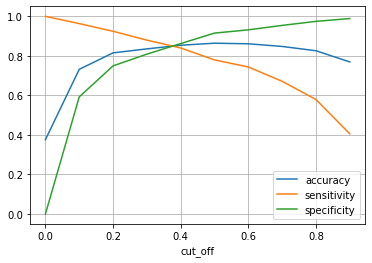

In [85]:
cutoff_df.plot.line(x='cut_off', y=['accuracy','sensitivity','specificity'])
plt.grid()
plt.show()

#### From the above Analysis We can Consider the optimal cuttoff point is 0.4

In [86]:
y_train_pred_final['predicted_values'] = y_train_pred_final.pred_prob.map(lambda x: 1 if x >0.4 else 0)
y_train_pred_final.head()

,converted,pred_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_values
0,1,0.962016,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.009591,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.689834,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.829806,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.483910,0,1,1,1,1,1,0,0,0,0,0,1


In [87]:
accu_score = accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted_values)

In [88]:
CM2 = confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted_values)
CM2

array([[3385,  541],
       [ 379, 1988]], dtype=int64)

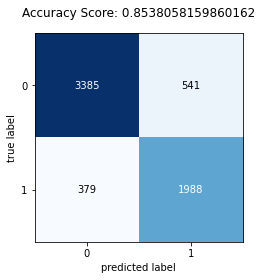

In [89]:
fig, ax = plot_confusion_matrix(conf_mat=CM2)
all_sample_title = 'Accuracy Score: {0}'.format(accu_score)
plt.title(all_sample_title, size = 12);
plt.tight_layout()
plt.show()

In [90]:
# tp = True Positive
# tn = True Negative
# fp = False Positive
# fn = False Neagatve
tp = CM2[1,1] 
tn = CM2[0,0] 
fp = CM2[0,1] 
fn = CM2[1,0] 
print("True Positive is", tp,', True Negative is', tn)
print("False Positive is", fp, ", False Negative is", fn)

True Positive is 1988 , True Negative is 3385
False Positive is 541 , False Negative is 379


In [91]:
print('Sensitivity is',tp/(fn+tp))
print('Specificity is',tn/(tn+fp))
print('Accuracy is',(tn+tp)/(tn+fp+fn+tp))

Sensitivity is 0.8398817068018589
Specificity is 0.8622007131940906
Accuracy is 0.8538058159860162


In [92]:
# Precision : tp/tp+fp 
precission = tp/(tp+fp)
# Recall tp/tp+fn
recall = tp/(tp+fn)

print("precission is ", precission, ", recall is", recall)

precission is  0.786081455120601 , recall is 0.8398817068018589


#### Precision and recall tradeoff for calculating model accuracy

In [93]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.predicted_values)

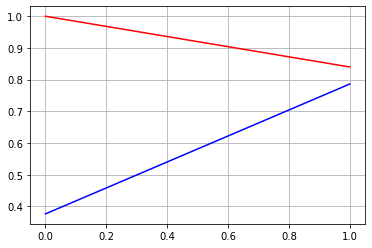

In [94]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid()
plt.show()

In [95]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_1,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_1,Country_Bahrain,Country_France,Country_India,Country_Oman,Country_Other_Country,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Newspaper_1
8692,3.0,304,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6126,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5198,3.0,425,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4979,4.0,861,4.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9225,2.0,74,2.0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### scaling test dataframe

In [96]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_1,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_1,Country_Bahrain,Country_France,Country_India,Country_Oman,Country_Other_Country,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Newspaper_1
8692,-0.084490,-0.321717,-0.420587,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6126,-1.077699,-0.881587,-1.139357,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5198,-0.084490,-0.098874,-0.420587,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4979,0.246579,0.704098,0.777363,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9225,-0.415560,-0.745303,-0.180997,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [97]:
cols=X_train_sm.columns.tolist()
cols.remove('const')

In [98]:
x_test_sm = sm.add_constant(X_test[cols])

In [99]:
y_test_pred = res2.predict(x_test_sm)

In [100]:
y_test_pred = pd.DataFrame(y_test_pred)

In [101]:
# converting to dataframe 
y_test_df = pd.DataFrame(y_test)
# Putting unique id to index
y_test_df['unique id'] = y_test_df.index

In [102]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [103]:
# Appending y_test_df and y_pred_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [104]:
y_pred_final.head()
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'prob_converted'})

In [105]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['unique id','Converted','prob_converted'], axis=1)

In [106]:
y_pred_final[:10]

,unique id,Converted,prob_converted
0,8692,0,0.531424
1,6126,1,0.981787
2,5198,1,0.447330
3,4979,1,0.772168
4,9225,0,0.004546
5,3533,1,0.012198
6,2726,1,0.726689
7,3450,0,0.092129
8,7683,1,0.979711
9,6286,0,0.023304


In [107]:
y_pred_final['final_predicted'] = y_pred_final.prob_converted.map(lambda x: 1 if x > 0.4 else 0)

accu_score = accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
accu_score

0.8602668643439585

##### As per our requirement we get the accuracy is greater than 80% (i.e 85%)

#### Creating Confusion Matrix after prediction of dataset

In [108]:
cm_test = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
cm_test

array([[1426,  240],
       [ 137,  895]], dtype=int64)

### Visualizing Confusion Matrix Of Test Data Set

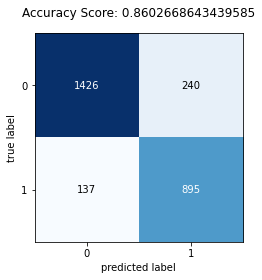

In [109]:
fig, ax = plot_confusion_matrix(conf_mat=cm_test)
all_sample_title = 'Accuracy Score: {0}'.format(accu_score)
plt.title(all_sample_title, size = 12);
plt.tight_layout()
plt.show()

#### tp = True Positive
#### tn = True Negative
#### fp = False Positive
#### fn = False Neagatve

In [110]:
tp = cm_test[1,1] 
tn = cm_test[0,0] 
fp = cm_test[0,1] 
fn = cm_test[1,0] 
print("True Positive is", tp,', True Negative is', tn)
print("False Positive is", fp, ", False Negative is", fn)

True Positive is 895 , True Negative is 1426
False Positive is 240 , False Negative is 137


In [111]:
print('Sencitivity is',tp/(fn+tp))
print('Specificity is',tn/(tn+fp))
print('Accuracy is',(tn+tp)/(tn+fp+fn+tp))

Sencitivity is 0.8672480620155039
Specificity is 0.8559423769507803
Accuracy is 0.8602668643439585


In [112]:
fpr = fp/(tn+fp)
fpr

0.14405762304921968

In [113]:
tpr = tp/(tp+fn)

In [114]:
fpr, tpr, thresholds = roc_curve( y_pred_final.Converted, y_pred_final.prob_converted, drop_intermediate = False )

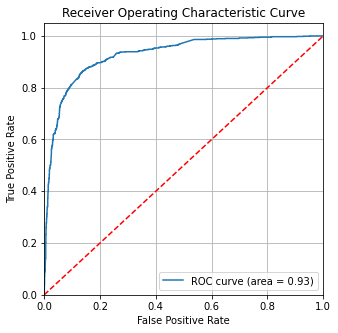

In [115]:
draw_roc( y_pred_final.Converted, y_pred_final.prob_converted)

#### Classification Report

In [116]:
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1666
           1       0.79      0.87      0.83      1032

    accuracy                           0.86      2698
   macro avg       0.85      0.86      0.85      2698
weighted avg       0.86      0.86      0.86      2698



In [117]:
y_pred_final.head()

,unique id,Converted,prob_converted,final_predicted
0,8692,0,0.531424,1
1,6126,1,0.981787,1
2,5198,1,0.447330,1
3,4979,1,0.772168,1
4,9225,0,0.004546,0


In [118]:
y_pred_final.isnull().shape

(2698, 4)

In [119]:
y_train_pred_final.head()

,converted,pred_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_values
0,1,0.962016,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.009591,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.689834,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.829806,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.483910,0,1,1,1,1,1,0,0,0,0,0,1


In [120]:
y_train_pred_final.shape

(6293, 14)

In [121]:
y_train_final=y_train_pred_final[['converted','pred_prob','predicted_values']] 
y_test_final=y_pred_final[['Converted','prob_converted','final_predicted']]

In [122]:
y_test_final.columns =['converted','pred_prob','predicted_values']

In [123]:
y_final=pd.concat([y_train_final, y_test_final], axis=0,ignore_index=True)

In [124]:
y_final['Lead Number']= (list(X_key))

In [125]:
y_final['Lead Score']=y_final['pred_prob']*100

In [126]:
y_final.head()

,converted,pred_prob,predicted_values,Lead Number,Lead Score
0,1,0.962016,1,660737,96.201609
1,0,0.009591,0,660728,0.959077
2,1,0.689834,1,660727,68.983381
3,1,0.829806,1,660719,82.980587
4,0,0.483910,1,660681,48.391033


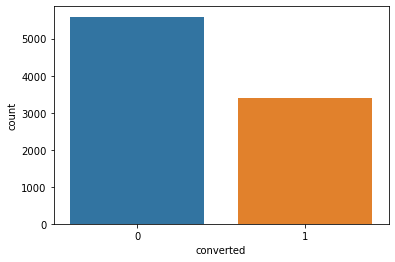

In [127]:
sns.countplot(y_final["converted"])
plt.show()

In [128]:
lead_score_df = lead_df.copy()
lead_score_df.shape

(9240, 37)

In [129]:
lead_score_final=pd.merge(lead_score_df,y_final,on='Lead Number',how='outer')

In [130]:
lead_score_final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,converted,pred_prob,predicted_values,Lead Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,1.0,0.962016,1.0,96.201609
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0.0,0.009591,0.0,0.959077
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1.0,0.689834,1.0,68.983381
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,1.0,0.829806,1.0,82.980587
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,0.0,0.483910,1.0,48.391033


#### Visualizing Dataset To visualizing distribution between Actual Data and Predicted Data

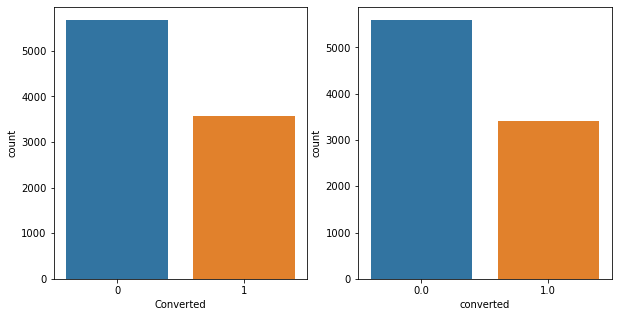

In [131]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(lead_score_final["Converted"])
plt.subplot(1,2,2)
sns.countplot(lead_score_final["converted"])
plt.show()

In [132]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res2.params[1:]
new_params

Total Time Spent on Website                             1.07
Lead Origin_Lead Add Form                               3.44
Lead Source_Olark Chat                                  1.03
Lead Source_Welingak Website                            3.41
Do Not Email_1                                         -1.62
Last Activity_Olark Chat Conversation                  -1.51
Last Activity_Other_Activity                            1.20
Last Activity_SMS Sent                                  1.65
What is your current occupation_Working Professional    0.92
Tags_Busy                                               1.79
Tags_Closed by Horizzon                                 2.86
Tags_Lost to EINS                                       3.54
Tags_Will revert after reading the email                2.81
Tags_switched off                                      -0.92
dtype: float64

In [133]:
important_features = new_params
important_features = 100.0 * (important_features / important_features.max())
important_features

Total Time Spent on Website                             30.14
Lead Origin_Lead Add Form                               97.03
Lead Source_Olark Chat                                  29.16
Lead Source_Welingak Website                            96.28
Do Not Email_1                                         -45.85
Last Activity_Olark Chat Conversation                  -42.61
Last Activity_Other_Activity                            33.81
Last Activity_SMS Sent                                  46.56
What is your current occupation_Working Professional    26.07
Tags_Busy                                               50.58
Tags_Closed by Horizzon                                 80.90
Tags_Lost to EINS                                      100.00
Tags_Will revert after reading the email                79.48
Tags_switched off                                      -25.97
dtype: float64

In [134]:
sorted_feature = np.argsort(important_features,kind='quicksort',order='list of str')
sorted_feature

Total Time Spent on Website                              4
Lead Origin_Lead Add Form                                5
Lead Source_Olark Chat                                  13
Lead Source_Welingak Website                             8
Do Not Email_1                                           2
Last Activity_Olark Chat Conversation                    0
Last Activity_Other_Activity                             6
Last Activity_SMS Sent                                   7
What is your current occupation_Working Professional     9
Tags_Busy                                               12
Tags_Closed by Horizzon                                 10
Tags_Lost to EINS                                        3
Tags_Will revert after reading the email                 1
Tags_switched off                                       11
dtype: int64

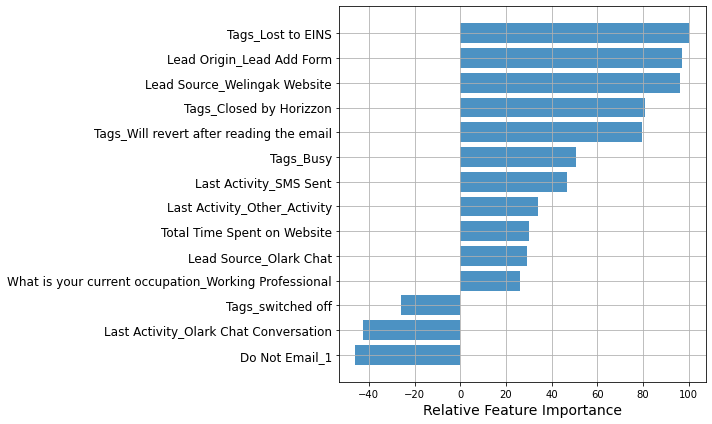

In [135]:
pos = np.arange(sorted_feature.shape[0]) + .5
featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, important_features[sorted_feature], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[cols].columns)[sorted_feature], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)
plt.tight_layout()   
plt.grid()
plt.show()

In [136]:
lead_score_final["Converted"].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [137]:
lead_score_final["converted"].value_counts()

0.00    5592
1.00    3399
Name: converted, dtype: int64

In [138]:
lead_score_final.shape

(9240, 41)